v0.1

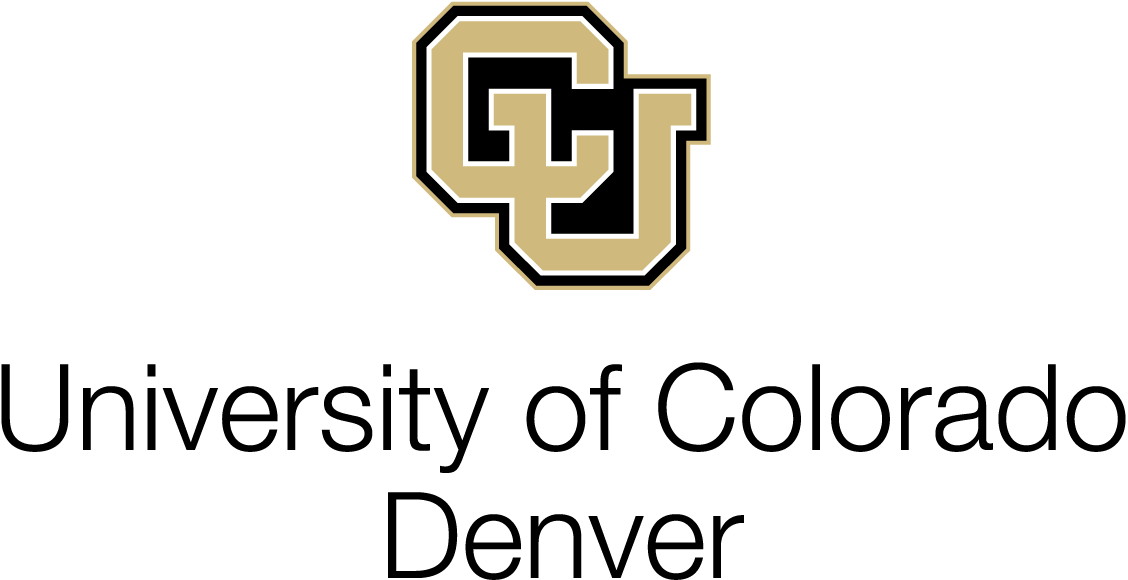

In [35]:
from IPython.display import Image
Image("http://cse.ucdenver.edu/~tamvu/images/cudenver.png",width=300, height=300)

# Jupyter Notebook Tutorial for Deep Learning Image Classification using Caffe on Google Cloud Platform with NVIDIA  Docker

Author: SREE SAI SHARAN PANTANGI

Graduate Research Assistant for Dr. Dan Connors, Department of Electrical Engineering, University of Colorado Denver

This notebook, walks through the process of creating a caffe model for image classification. We will be using google's creative-commons licensed flower photos as our dataset. At the end of this notebook, you will also be able to download you model onto your VM for inference later.

Let us verify if the docker container that we had started is still running.

In [3]:
!curl localhost:5000/index.json

{
  "datasets": [], 
  "jobs_dir": "/jobs", 
  "models": [], 
  "server_name": "8689d98142fe", 
  "version": "6.0.0"
}

     The above Response Indicates that there are currently no datasets or models on the server as of now.

We had initialized our container to talk to port 5000, using this port we shall communicate with DIGITS

   In order to create a dataset, you will first need to log in. The following command will log us in as user, you may enter your name. You can change username to your name if you'd like. The whole point of logging in is that multiple users can login to the same DIGITS server, create models, datasets and download them at the same time. 

In [4]:
!curl localhost:5000/login -c digits.cookie -XPOST -F username=user

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>Redirecting...</title>
<h1>Redirecting...</h1>
<p>You should be redirected automatically to target URL: <a href="/">/</a>.  If not click the link.

  We are going to download google's creative-commons licensed flower photos for our dataset.

In [5]:
!curl http://download.tensorflow.org/example_images/flower_photos.tgz \
    | tar xz -C ~/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0   109M      0  0:00:02  0:00:02 --:--:-- 78.4M


 By listing our dataset, we can infer that our dataset consists of 5 classes, with each class having >100 images

In [6]:
!ls ~/flower_photos


daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


 Set path to create dataset on DIGITS, the following has the path set to '/home/srpa3180/flower_photos/', in your case it will be 'home/your/username/flower_photos/'. You can name your dataset as well.

In [9]:
FLOWER_PHOTO_PATH='/home/sharan\.sreesai/flower_photos/'
NAME_OF_DATASET='google_flowers_dataset'

In [10]:
!curl localhost:5000/datasets/images/classification.json -b digits.cookie -XPOST -F folder_train=$FLOWER_PHOTO_PATH -F encoding=jpg -F resize_channels=1 -F resize_width=240 -F resize_height=240 -F method=folder -F dataset_name=$NAME_OF_DATASET

{
  "id": "20171025-005921-aa61", 
  "name": "google_flowers_dataset", 
  "status": "Initialized"
}

 To check the status of your initialized dataset, notedown the id provided above.

In [11]:
!curl localhost:5000/datasets/20171025-005921-aa61/status

{"status": "Done", "type": "Image Classification Dataset", "name": "google_flowers_dataset", "error": null}

As shown above, it says that the dataset is complete.

To get a detailed description of the dataset, we can run the following:

In [12]:
!curl localhost:5000/datasets/20171025-005921-aa61.json

{
  "CreateDbTasks": [
    {
      "backend": "lmdb", 
      "compression": "none", 
      "encoding": "jpg", 
      "entries": 2753, 
      "image_channels": 1, 
      "image_height": 240, 
      "image_width": 240, 
      "name": "Create DB (train)"
    }, 
    {
      "backend": "lmdb", 
      "compression": "none", 
      "encoding": "jpg", 
      "entries": 917, 
      "image_channels": 1, 
      "image_height": 240, 
      "image_width": 240, 
      "name": "Create DB (val)"
    }
  ], 
  "ParseFolderTasks": [
    {
      "label_count": 5, 
      "name": "Parse Folder (train/val)", 
      "test_count": 0, 
      "train_count": 2753, 
      "val_count": 917
    }
  ], 
  "directory": "/jobs/20171025-005921-aa61", 
  "id": "20171025-005921-aa61", 
  "name": "google_flowers_dataset", 
  "status": "Done"
}

Its Important we note down the dataset id as shown from the above response, as we shall create our model using this id.

For creating our caffe model, we shall run the following, by changing the dataset equal to the id mentioned above, and you can rename your model_name. I am using googlenet as my standard_network, you can choose from lenet, googlenet and alexnet. I am running my model for 30 iterations(epochs), you can change it if you'd like increasing to a higher number for better accuracy.

In [13]:
!curl localhost:5000/models/images/classification.json -b digits.cookie -XPOST -F model_name=google_flowers_model -F dataset=20171025-005921-aa61 -F method=standard -F standard_networks=googlenet -F train_epochs=30 -F framework=caffe 

{
  "caffe flavor": "NVIDIA", 
  "caffe version": "0.15.14", 
  "creation time": "2017-10-25 01:09:25.995985", 
  "dataset_id": "20171025-005921-aa61", 
  "deploy file": "deploy.prototxt", 
  "digits version": "6.0.0", 
  "framework": "caffe", 
  "id": "20171025-010925-8d03", 
  "image dimensions": [
    240, 
    240, 
    1
  ], 
  "image resize mode": "squash", 
  "job id": "20171025-010925-8d03", 
  "labels file": "labels.txt", 
  "mean file": "mean.binaryproto", 
  "model file": "original.prototxt", 
  "name": "google_flowers_model", 
  "snapshot file": "no snapshots", 
  "solver file": "solver.prototxt", 
  "status": "Initialized", 
  "train_val file": "train_val.prototxt", 
  "username": "user"
}

The above response means that our model has been initialized. Its Important we note down the job id of our model as shown from the above response, as we will use it to check its status.

 Run the following to check the status, by changing '/20171024-074102-fe73/status' to '/20171025-010925-8d03/status' wich is the job id as shown above.

In [14]:
!curl localhost:5000/models/20171025-010925-8d03/status

{"status": "Running", "type": "Image Classification Model", "name": "google_flowers_model", "error": null}

The model is still running, to get a better response i.e. knowing which iteration is currently running run the following by changing it with your job id:

In [15]:
!curl localhost:5000/models/20171025-010925-8d03.json

{
  "caffe flavor": "NVIDIA", 
  "caffe version": "0.15.14", 
  "creation time": "2017-10-25 01:09:25.995985", 
  "dataset_id": "20171025-005921-aa61", 
  "deploy file": "deploy.prototxt", 
  "digits version": "6.0.0", 
  "directory": "/jobs/20171025-010925-8d03", 
  "framework": "caffe", 
  "id": "20171025-010925-8d03", 
  "image dimensions": [
    240, 
    240, 
    1
  ], 
  "image resize mode": "squash", 
  "job id": "20171025-010925-8d03", 
  "labels file": "labels.txt", 
  "mean file": "mean.binaryproto", 
  "model file": "original.prototxt", 
  "name": "google_flowers_model", 
  "snapshot file": "snapshot_iter_783.caffemodel", 
  "snapshots": [
    1, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    8, 
    9
  ], 
  "solver file": "solver.prototxt", 
  "status": "Running", 
  "train_val file": "train_val.prototxt", 
  "username": "user"
}

We notice that 9 iterations have been completed as indicated through "snapshots".

In [17]:
!nvidia-smi

Wed Oct 25 01:20:55 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.66                 Driver Version: 384.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0   133W / 149W |   3255MiB / 11439MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

To get check on GPU utilization and Memory, we can call the above command, which shows the below description. 

In [18]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Yonina_Tulip.jpg/220px-Yonina_Tulip.jpg -P ~/

--2017-10-25 01:22:13--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Yonina_Tulip.jpg/220px-Yonina_Tulip.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11827 (12K) [image/jpeg]
Saving to: ‘/home/sharan.sreesai/220px-Yonina_Tulip.jpg’

100%[======================================>] 11,827      --.-K/s   in 0.001s  

2017-10-25 01:22:14 (10.7 MB/s) - ‘/home/sharan.sreesai/220px-Yonina_Tulip.jpg’ saved [11827/11827]



To check for accuracy of our running model, we first download a smaple test image from wikipidia, as shown above.

In [24]:
TEST_IMAGE='/home/sharan.sreesai/220px-Yonina_Tulip.jpg'

The Image that we are going to test is:

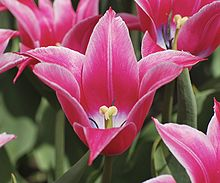

In [25]:
Image(TEST_IMAGE)

To test for accuracy of our running model, we run the following by changing the job id:

In [27]:
!curl localhost:5000/models/images/classification/classify_one.json -XPOST -F job_id=20171025-010925-8d03 -F image_file=@$TEST_IMAGE

{
  "predictions": [
    [
      "tulips", 
      75.96
    ], 
    [
      "roses", 
      20.75
    ], 
    [
      "sunflowers", 
      2.23
    ], 
    [
      "dandelion", 
      0.55
    ], 
    [
      "daisy", 
      0.51
    ]
  ]
}

If you get a lower score, try running it againg after a few more iterations, the predictions get better.

Checking the status of our model once again, we notice that 30 epoch's have completed.

In [28]:
!curl localhost:5000/models/20171025-010925-8d03.json

{
  "caffe flavor": "NVIDIA", 
  "caffe version": "0.15.14", 
  "creation time": "2017-10-25 01:09:25.995985", 
  "dataset_id": "20171025-005921-aa61", 
  "deploy file": "deploy.prototxt", 
  "digits version": "6.0.0", 
  "directory": "/jobs/20171025-010925-8d03", 
  "framework": "caffe", 
  "id": "20171025-010925-8d03", 
  "image dimensions": [
    240, 
    240, 
    1
  ], 
  "image resize mode": "squash", 
  "job id": "20171025-010925-8d03", 
  "labels file": "labels.txt", 
  "mean file": "mean.binaryproto", 
  "model file": "original.prototxt", 
  "name": "google_flowers_model", 
  "snapshot file": "snapshot_iter_2610.caffemodel", 
  "snapshots": [
    1, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    8, 
    9, 
    10, 
    11, 
    12, 
    13, 
    14, 
    15, 
    16, 
    17, 
    18, 
    19, 
    20, 
    21, 
    22, 
    23, 
    24, 
    25, 
    26, 
    27, 
    28, 
    29, 
    30
  ], 
  "solver file": "solver.prototxt", 
  "status": "Done", 
  "train_val fi

To download your model from docker container, Run this function:

In [29]:
def download_caffe_model(dataset_id,job_id,dir_name,docker_container_name):
    dataset_id_path='jobs/'+dataset_id
    job_id_path='jobs/'+job_id
    d_ir='~/'+dir_name
    !mkdir $d_ir
    d_ir_temp=d_ir+'_temp'
    !mkdir $d_ir_temp
    !sudo nvidia-docker cp $docker_container_name:$dataset_id_path $d_ir_temp
    !sudo nvidia-docker cp $docker_container_name:$job_id_path $d_ir_temp
    !sudo ls -tr $d_ir_temp/$job_id/*.caffemodel
    caffe_model_selection=raw_input()
    if (str(caffe_model_selection)==str('all') or str(caffe_model_selection)==str('ALL')):
        !sudo cp $d_ir_temp/$job_id/*.caffemodel $d_ir
        !sudo cp $d_ir_temp/$job_id/caffe_output.log $d_ir
    else:
        
        !sudo cp $caffe_model_selection $d_ir
    !sudo cp $d_ir_temp/$dataset_id/labels.txt $d_ir
    !sudo cp $d_ir_temp/$dataset_id/mean.binaryproto $d_ir
    !sudo cp $d_ir_temp/$job_id/deploy.prototxt $d_ir
    !sudo cp $d_ir_temp/$job_id/original.prototxt $d_ir
    !sudo cp $d_ir_temp/$job_id/solver.prototxt $d_ir
    !sudo cp $d_ir_temp/$job_id/train_val.prototxt $d_ir
    !sudo rm -rf $d_ir_temp/

You call the function, by passing in your dataset id, model job id, name a directory for your model to be saved; I'm naming it flowers_model and finally the name of your docker container 

If your unsure of the name of your docker container run:

In [31]:
!sudo docker ps

CONTAINER ID        IMAGE               COMMAND              CREATED             STATUS              PORTS                              NAMES
8689d98142fe        nvidia/digits       "python -m digits"   About an hour ago   Up About an hour    0.0.0.0:5000->5000/tcp, 6006/tcp   my_docker_container


In my case I've named it my_docker_container, your may vary if you've changed it. You will be prompted for an input, either enter one among the shown path's (Iterations are in Ascending order, Epoch 1 is the top one and Epoch 30 is the last one at the bottom) or if you want all iterations with the caffe log enter 'all'

In [32]:
download_caffe_model('20171025-005921-aa61','20171025-010925-8d03','flower_model','my_docker_container')


/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_87.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_174.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_261.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_348.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_435.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_522.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_609.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_696.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_783.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_870.caffemodel
/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_957.caffemodel
/home/sharan.sreesai/f

I only wanted the model of my final iteration, so i copied and entered '/home/sharan.sreesai/flower_model_temp/20171025-010925-8d03/snapshot_iter_2610.caffemodel' form what is shown above. You see two of them for the same reason. 

Your model will be saved in '~/' followed by what you've called your model to be saved as which is the home directory of the VM.

In [33]:
!ls ~/flower_model

deploy.prototxt   original.prototxt		 train_val.prototxt
labels.txt	  snapshot_iter_2610.caffemodel
mean.binaryproto  solver.prototxt


The most convenient way to download you model is using FTP(File Transfer Protocol)/SFTP(Secure File Transfer Protocol) Client Softwares like WinSCP for Windows, Filezilla for Linux and Cyberduck for macOS. Instruction given in link below. Feel free to use any remote file transfer software that's convenient for you.

https://github.com/s3p02/gcp_remote_file_transfer/blob/master/README.md

I humbly thank Dr. Dan Connors for all his support and guidance while preparing this tutorial.